## Polynomial Regression

In [ ]:
#(Only one feature)Univariate Linear regression type
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

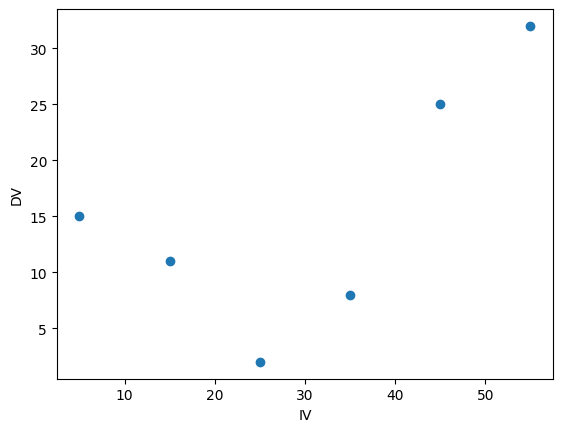

In [ ]:
plt.scatter(x,y)
plt.xlabel("IV")
plt.ylabel("DV")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [ ]:
x_new=transformer.transform(x)
print(x_new)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [ ]:
MLR=LinearRegression()

In [ ]:
MLR.fit(x_new,y)

LinearRegression()

In [ ]:
y_pred=MLR.intercept_+np.sum(MLR.coef_*x_new,axis=1)
print(y_pred)

[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


MSE: 11.305952380952384
Intercept= 21.37232142857144
Slope= [-1.32357143  0.02839286]


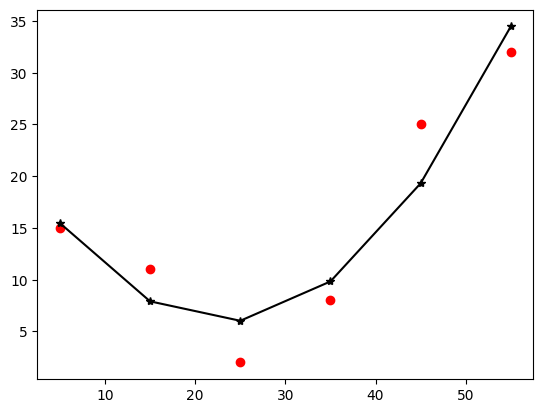

In [ ]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y,y_pred)
plt.scatter(x,y,color='Red')
plt.plot(x,y_pred,color='Black',marker='*')

print("MSE:",mse)
print("Intercept=",MLR.intercept_)
print("Slope=",MLR.coef_)

In [ ]:
#for Multivariate Regression type
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x1=np.array([[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]).reshape((-1,2))
y1=np.array([4, 5, 20, 14, 32, 22, 38, 43])

In [ ]:



from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
transformer1 = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
transformer1.fit(x1)

PolynomialFeatures(include_bias=False)

In [ ]:
x_new1=transformer1.transform(x1)
print(x_new1)

[[0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00]
 [5.000e+00 1.000e+00 2.500e+01 5.000e+00 1.000e+00]
 [1.500e+01 2.000e+00 2.250e+02 3.000e+01 4.000e+00]
 [2.500e+01 5.000e+00 6.250e+02 1.250e+02 2.500e+01]
 [3.500e+01 1.100e+01 1.225e+03 3.850e+02 1.210e+02]
 [4.500e+01 1.500e+01 2.025e+03 6.750e+02 2.250e+02]
 [5.500e+01 3.400e+01 3.025e+03 1.870e+03 1.156e+03]
 [6.000e+01 3.500e+01 3.600e+03 2.100e+03 1.225e+03]]


In [ ]:

MLR1=LinearRegression()

In [ ]:
MLR1.fit(x_new1,y1)

LinearRegression()

In [ ]:
y_pred1=MLR1.intercept_+np.sum(MLR1.coef_*x_new1,axis=1)
print(y_pred1)

[ 0.54047408 11.36340283 16.07809622 15.79139    29.73858619 23.50834636
 39.05631386 41.92339046]


MSE: 10.089451361420558
Intercept= 0.8430556452395876
Slope= [ 2.44828275  0.16160353 -0.15259677  0.47928683 -0.4641851 ]


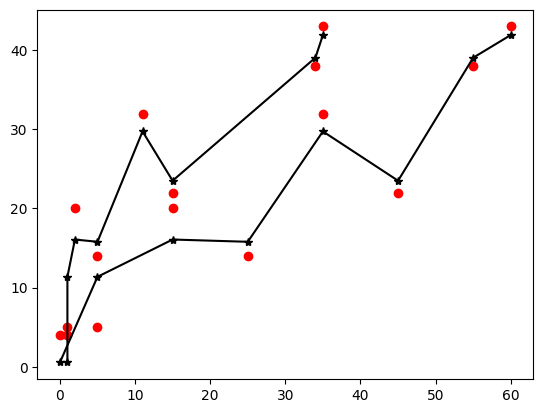

In [ ]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y1,y_pred1)
plt.scatter(x1[:,0],y1,color='Red')
plt.scatter(x1[:,1],y1,color='Red')
plt.plot(x1,y_pred1,color='Black',marker='*')

print("MSE:",mse)
print("Intercept=",MLR1.intercept_)
print("Slope=",MLR1.coef_)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
k = pd.read_excel('/content/poly_data.xlsx', usecols='A')
l = pd.read_excel('/content/poly_data.xlsx', usecols='B')
x = np.array(k).reshape((-1, 1))
y = np.array(l)


# Feature scaling
x_min = np.min(x, axis=0)
x_max = np.max(x, axis=0)
x = (x - x_min) / (x_max - x_min)

# Initialize coefficients
Wo = 0.0
W1 = 0.0
W2 = 0.0
alpha = 0.01
m = len(x)  # The number of data points

def cost_function(x, y, Wo, W1, W2):
    m = len(y)
    h = Wo + W1 * x+ W2 * (x**2)
    return (1 / (2 * m)) * np.sum((h - y) ** 2)

def gradient(Wo, W1, W2, x, y, alpha):
    threshold = 0.0000001
    prev_loss = 0.0
    count = 0
    while True:
        pred = Wo + W1 * x + W2 *(x**2)
        mse1 = np.mean(pred - y)
        mse2 = np.mean((pred - y) * x)
        mse3 = np.mean((pred - y) * (x**2))
        cost = cost_function(x, y, Wo, W1, W2)
        Wo -= alpha * mse1
        W1 -= alpha * mse2
        W2 -= alpha * mse3

        cost /= (2.0 * m)
        count += 1
        if abs(prev_loss - cost) < threshold:
            break

        prev_loss = cost

    print(count)
    return Wo, W1, W2

Wo, W1, W2 = gradient(Wo, W1, W2, x, y, alpha)
pred = Wo + W1 * x + W2 * (x**2)
print(pred)

plt.scatter(x, y, color='Red')
plt.plot(x, pred, color='Black', marker='*', linestyle='dotted')
plt.show()
